# Projet Analyse des Données Bancaires

## Contexte

 Vous êtes data scientist/data analyst dans une banque et votre entreprise souhaite *analyser l'efficacité des campagnes de marketing direct basées sur les appels téléphoniques.*

L'objectif est de déterminer si *ces campagnes influencent positivement la souscription des clients à des dépôts à terme.*

Pour cela, vous disposez de quatre ensembles de données détaillant les interactions avec les clients sur une période allant de *mai 2008 à novembre 2010*.

### Objectif

Votre mission consiste à effectuer une analyse exploratoire des données pour identifier les tendances, les comportements des clients, et d'autres insights pertinents qui peuvent aider la banque à optimiser ses futures campagnes de marketing.

### Jeu De données

Vous disposez du jeu de données donnee_marketing_banque.csv, qui comprend *41 188 exemples avec 20 variables*, couvrant la période de mai 2008 à novembre 2010. Ces données incluent des informations sur les appels effectués, les caractéristiques des clients, et la réponse finale du client (souscription ou non à un dépôt à terme).

Le jeu de données peut être téléchargé à partir du [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets).

### Description des données

#### Description des Variables



- age: Âge du client.
- job: Type de métier du client (ex. "manager", "blue-collar", "retired").
- marital: État civil du client (ex. "married", "single", "divorced").
- education: Niveau d'études du client (ex. "secondary", "primary", "tertiary").
- default: Présence ou absence de défaut de paiement de crédit (ex. "yes", "no  
- balance: Solde annuel moyen sur le compte du client.
- housing: Présence ou absence de prêt immobilier (ex. "yes", "no").
- loan: Présence ou absence de prêt personnel (ex. "yes", "no").
- contact: Moyen de communication avec le client (ex. "telephone", "cellular", "unknown").
- day: Jour du mois de la dernière prise de contact.
- month: Mois de l'année de la dernière prise de contact.
- duration: Durée de la dernière communication, en secondes.
- campaign: Nombre de contacts effectués pendant cette campagne pour ce client.
- pdays: Nombre de jours écoulés depuis le dernier contact du client lors d'une campagne précédente (999 indique que le client n'a pas été contacté précédemment).
- previous: Nombre de contacts réalisés avant cette campagne pour ce client.
- poutcome: Résultat de la campagne marketing précédente (ex. "failure", "nonexistent", "success").
- y: Le client a-t-il souscrit un dépôt à terme ? (variable cible, ex. "yes", "no").


In [2]:
### importation des package
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DIABONE Jean Claude\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
### importation de la base

df = pd.read_csv("donnees_marketing_banque.csv", sep = ";")

In [4]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,id45207,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,id45211,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

##### Comnien de clients et combien de variables

In [7]:
df.shape

(45211, 18)

In [8]:
### 45211 clients et 18 variables

In [9]:
## les stats descriptive
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45206.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.403707,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.906741,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.describe(include = "all")

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211.000000,45211,45211,45211,45211,45206.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,45211,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,id1,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,1,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,NaN,40.931477,NaN,NaN,NaN,NaN,1362.403707,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,NaN,10.623372,NaN,NaN,NaN,NaN,3044.906741,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,NaN,10.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [11]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

#### Nombre de valeur par modalités

In [12]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

<AxesSubplot:xlabel='education'>

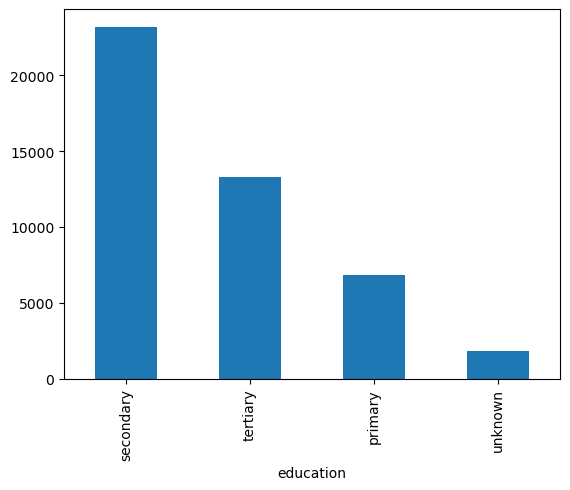

In [13]:
df['education'].value_counts().plot(kind = 'bar')

## Nettoyage des données

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         45211 non-null  object 
 1   age        45211 non-null  int64  
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45206 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.2+ MB


In [15]:
## les valeurs manquantes
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      5
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df.isnull().sum()/len(df)

id           0.000000
age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000111
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
y            0.000000
dtype: float64

In [17]:
## suppression des valeurs manquantes selon la ligne
df_missinf_deleted_l = df.dropna(axis = 0)

In [18]:
df_missinf_deleted_l.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,40.930828,1362.403707,15.807614,258.161616,2.764036,40.202385,0.580388
std,10.623495,3044.906741,8.322160,257.539139,3.098137,100.133346,2.303560
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
### Suppression des valeurs manquantes selon la colonne
df_missinf_deleted_C = df.dropna(axis = 1)
df_missinf_deleted_C.describe()

,age,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
### remplacer les valeurs manquantes par une valeur spécifique
df_remplacer = df.fillna(0)
df_remplacer.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.253036,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.772068,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
### remplacer les valeurs manquantes par la moyenne
moy = df["balance"].mean()
df_remplacer_moy = df.fillna(moy)

In [22]:
df_remplacer_moy.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Suppression des colonnes initules

In [23]:
### Suppression d'une colonne
df_without_month = df.drop(["month"], axis = 1)
df_without_month.head(1)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,261,1,-1,0,unknown,no


In [24]:
### suppressio simultanée de plusieurs colonnes
df_sup = df.drop(["month", "day"], axis = 1)
df_sup.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,198,1,-1,0,unknown,no


### Choisir une colonne spécifique

In [25]:
age = df["age"]
age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [26]:
type(age)

pandas.core.series.Series

In [27]:
age.describe()

count    45211.000000
mean        40.931477
std         10.623372
min         10.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [28]:
### Une autre approche
age = df.age

In [29]:
### Choisir et décrire plusieurs variables à partir des noms
base_select = df[["age", "loan", "education"]]
base_select

,age,loan,education
0,58,no,tertiary
1,44,no,secondary
2,33,yes,secondary
3,47,no,unknown
4,33,no,unknown
...,...,...,...
45206,51,no,tertiary
45207,71,no,primary
45208,72,no,secondary
45209,57,no,secondary


In [30]:
### Ou bien faire ceci
list_variables = ["age", "loan", "education"]
base_select = df[list_variables]
print(base_select)

       age loan  education
0       58   no   tertiary
1       44   no  secondary
2       33  yes  secondary
3       47   no    unknown
4       33   no    unknown
...    ...  ...        ...
45206   51   no   tertiary
45207   71   no    primary
45208   72   no  secondary
45209   57   no  secondary
45210   37   no  secondary

[45211 rows x 3 columns]


In [31]:
type(base_select)

pandas.core.frame.DataFrame

In [32]:
base_select = df.loc[:, list_variables]
base_select

,age,loan,education
0,58,no,tertiary
1,44,no,secondary
2,33,yes,secondary
3,47,no,unknown
4,33,no,unknown
...,...,...,...
45206,51,no,tertiary
45207,71,no,primary
45208,72,no,secondary
45209,57,no,secondary


In [33]:
## choisir à partir des numéros de colonnes

base_wiht_iloc = df.iloc[:, 1]
base_wiht_iloc

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [34]:
base_wiht_iloc = df.iloc[:, 1:3]
base_wiht_iloc

,age,job
0,58,management
1,44,technician
2,33,entrepreneur
3,47,blue-collar
4,33,unknown
...,...,...
45206,51,technician
45207,71,retired
45208,72,retired
45209,57,blue-collar


In [35]:
base_wiht_iloc = df.iloc[:, [1,3,5]]
base_wiht_iloc

,age,marital,default
0,58,married,no
1,44,single,no
2,33,married,no
3,47,married,no
4,33,single,no
...,...,...,...
45206,51,married,no
45207,71,divorced,no
45208,72,married,no
45209,57,married,no


In [36]:
### selectionner les 100 premier lignes

base_wiht_iloc = df.iloc[0:100, [1,3,5]]
base_wiht_iloc

,age,marital,default
0,58,married,no
1,44,single,no
2,33,married,no
3,47,married,no
4,33,single,no
...,...,...,...
95,36,married,no
96,55,married,no
97,60,married,no
98,39,married,no


## Sélectionner un périmètre d'analyse

In [37]:
### supression des clients qui ont moinss de 18 ans

df["age"] >= 18
base_majeur = df[df["age"] >= 18]
base_majeur.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
### selection des clients majeurs qui sont au secondaire
(df['age'] >= 18) & (df['education'] == "secpndaire")
base_majeur = df[(df['age'] >= 18) & (df['education'] == "secondary")]
base_majeur.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
9,id10,43,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,id11,41,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,id12,29,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no


In [39]:
base_majeur['education'].unique()

array(['secondary'], dtype=object)

In [40]:
base_select = df.loc[df["age"] >= 18, ['age', 'education', 'marital']]
base_select.head(5)

,age,education,marital
0,58,tertiary,married
1,44,secondary,single
2,33,secondary,married
3,47,unknown,married
4,33,unknown,single


### Créer une colonne tranche d'age <18 entre 18 et 25, de 25 à 50 et plus de 50

In [41]:
df["tranche_age"] = np.nan

In [42]:
df["tranche_age"][df["age"] < 18] = "<18"
df["tranche_age"][(df["age"] >= 18) & (df["age"] < 25)] = "18-25"
df["tranche_age"][(df["age"] >= 25) & (df["age"] < 50)] = "25-50"
df["tranche_age"][(df["age"] >= 50)] = ">=50"

C:\Users\DIABONE Jean Claude\AppData\Local\Temp\ipykernel_1780\678696146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tranche_age"][df["age"] < 18] = "<18"


In [43]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,tranche_age
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,>=50
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,25-50
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,25-50
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,25-50
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,>=50
45207,id45208,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,>=50
45208,id45209,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes,>=50
45209,id45210,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no,>=50


In [44]:
df['tranche_age'].unique()

array(['>=50', '25-50', '<18', '18-25'], dtype=object)

<AxesSubplot:xlabel='tranche_age'>

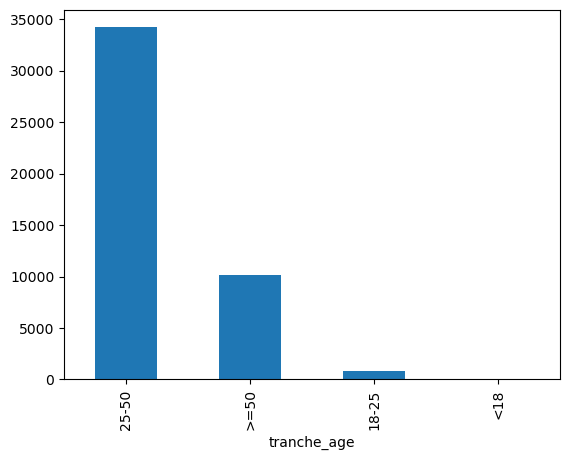

In [45]:
df['tranche_age'].value_counts().plot(kind = "bar")

In [46]:
### calculer la moyenne de la balance par tranche d'age
df.groupby("tranche_age")["balance"].mean()

tranche_age
18-25     916.949257
25-50    1236.063830
<18        72.625000
>=50     1822.763788
Name: balance, dtype: float64

In [47]:
## Filtrer sur les clients de plus de 25 ans
df['age'] > 25
base = df[df['age'] > 25]

In [48]:
### Calculer l'age moyen des clients selon le niveau d'éducation
base.groupby("education")["age"].mean()

education
primary      46.197571
secondary    40.616153
tertiary     39.883466
unknown      45.830576
Name: age, dtype: float64

### Visualisation des variables

In [49]:
### Décrire la nature des variables
df.dtypes

id              object
age              int64
job             object
marital         object
education       object
default         object
balance        float64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
tranche_age     object
dtype: object

In [50]:
### Stat Desc
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45206.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.403707,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.906741,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [51]:
df.describe(include = "all")

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,tranche_age
count,45211,45211.000000,45211,45211,45211,45211,45206.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211,45211
unique,45211,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2,4
top,id1,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no,25-50
freq,1,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922,34203
mean,NaN,40.931477,NaN,NaN,NaN,NaN,1362.403707,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN,NaN
std,NaN,10.623372,NaN,NaN,NaN,NaN,3044.906741,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN,NaN
min,NaN,10.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN


In [52]:
### Les valeurs manquantes
df.isnull().sum()/len(df)

id             0.000000
age            0.000000
job            0.000000
marital        0.000000
education      0.000000
default        0.000000
balance        0.000111
housing        0.000000
loan           0.000000
contact        0.000000
day            0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.000000
y              0.000000
tranche_age    0.000000
dtype: float64

In [53]:
## Conserver uniquement les clients majeurs

df_majeur = df[df["age"] >= 18]
df_majeur.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45198.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,40.936133,1362.631997,15.808331,258.168816,2.764153,40.205119,0.580426
std,10.618494,3045.126997,8.321971,257.548471,3.098206,100.136106,2.303632
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [54]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'tranche_age'],
      dtype='object')

## Visualisation des variables Quantitatives Univariées

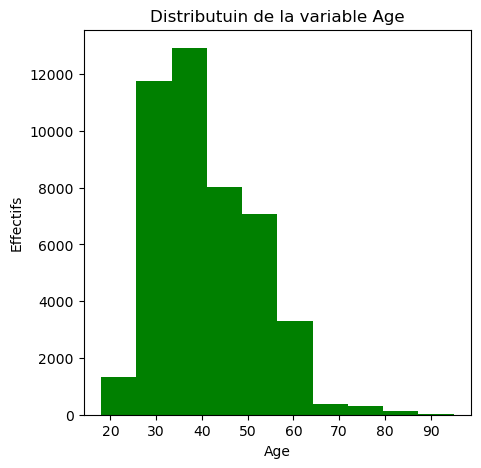

In [82]:
## histogramme de l'age
plt.figure(figsize = (5, 5))
plt.hist(df_majeur["age"], color = "green", bins = 10)
plt.title("Distributuin de la variable Age")
plt.xlabel("Age")
plt.ylabel("Effectifs")
plt.show()

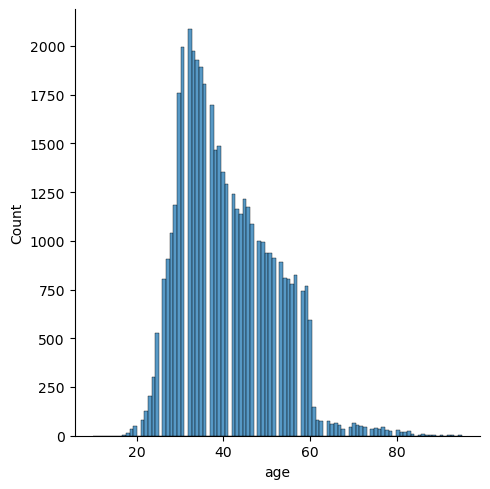

In [84]:
sns.displot(x ="age", data = df, kind = 'hist')

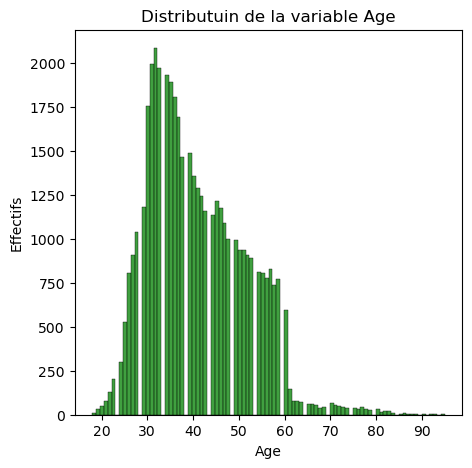

In [56]:
plt.figure(figsize = (5, 5))
sns.histplot(df_majeur["age"], color = "green")
plt.title("Distributuin de la variable Age")
plt.xlabel("Age")
plt.ylabel("Effectifs")
plt.show()

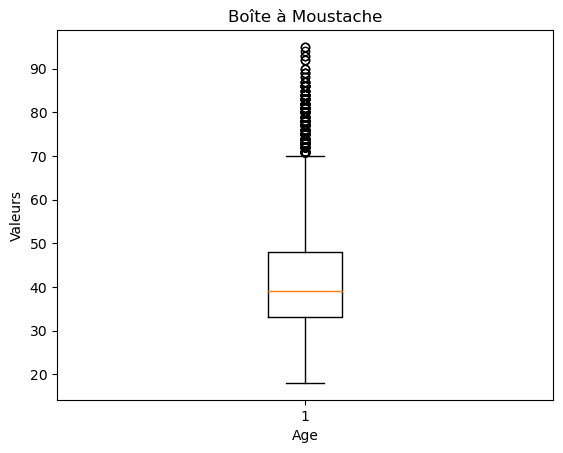

In [57]:
### Boîte à moustache
plt.boxplot(df_majeur["age"])
plt.title("Boîte à Moustache")
plt.xlabel("Age")
plt.ylabel("Valeurs")
plt.show()

C:\Users\DIABONE Jean Claude\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


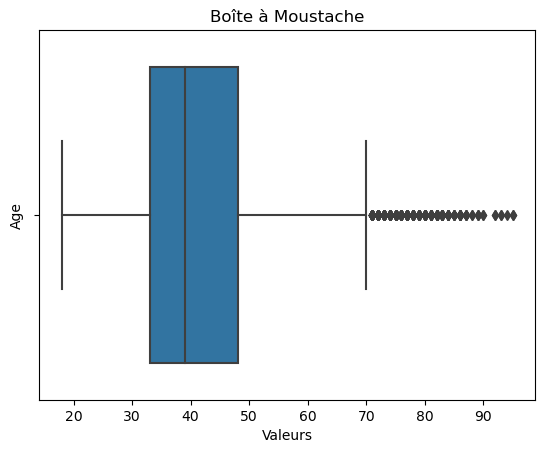

In [58]:
sns.boxplot(df_majeur["age"])
plt.title("Boîte à Moustache")
plt.xlabel("Valeurs")
plt.ylabel("Age")
plt.show()

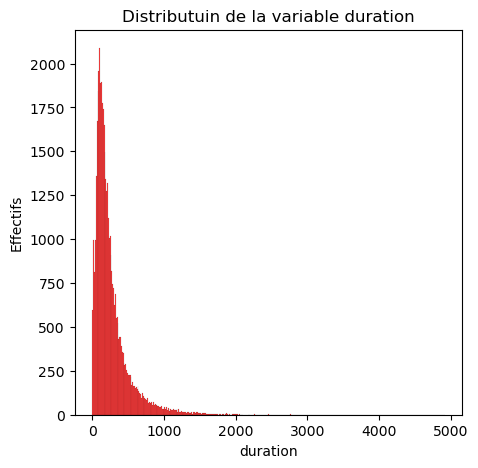

In [59]:
plt.figure(figsize = (5, 5))
sns.histplot(df_majeur["duration"], color = "red")
plt.title("Distributuin de la variable duration")
plt.xlabel("duration")
plt.ylabel("Effectifs")
plt.show()

### Visualisation des variables Qualitative

In [60]:
## Diagramme en barre

effectif = df_majeur['education'].value_counts().reset_index()
print(effectif)

   education  count
0  secondary  23199
1   tertiary  13298
2    primary   6849
3    unknown   1857


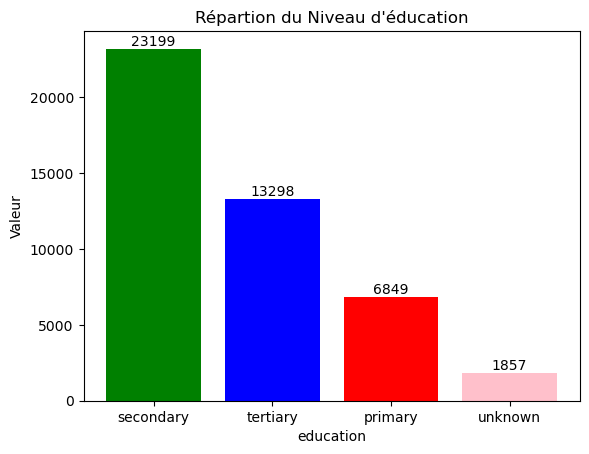

In [61]:
couleur = ["green", "blue", "red", "pink"]
plt.bar(effectif['education'], effectif['count'], color = couleur)
## Ajout des étiquettes
for i, freq in enumerate(effectif["count"]):
    plt.text(i, freq, str(freq), ha = "center", va = 'bottom')
plt.xlabel("education")
plt.ylabel('Valeur')
plt.title("Répartion du Niveau d'éducation")
plt.show()

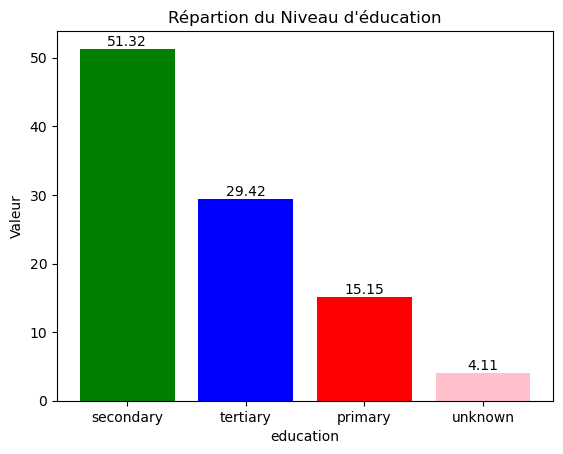

In [62]:
effectif["proportion"] = round( (effectif["count"]/effectif["count"].sum()*100), 2)
couleur = ["green", "blue", "red", "pink"]
plt.bar(effectif['education'], effectif['proportion'], color = couleur)
## Ajout des étiquettes
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha = "center", va = 'bottom')
plt.xlabel("education")
plt.ylabel('Valeur')
plt.title("Répartion du Niveau d'éducation")
plt.show()

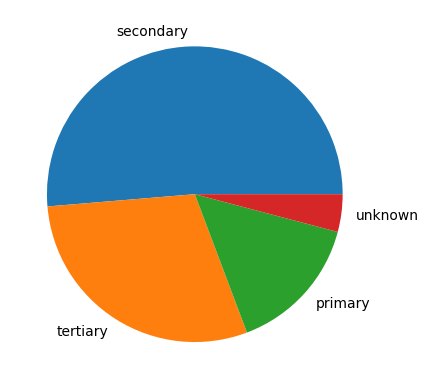

In [63]:
plt.pie(effectif["count"], labels = effectif["education"])
plt.show()

<AxesSubplot:xlabel='education', ylabel='count'>

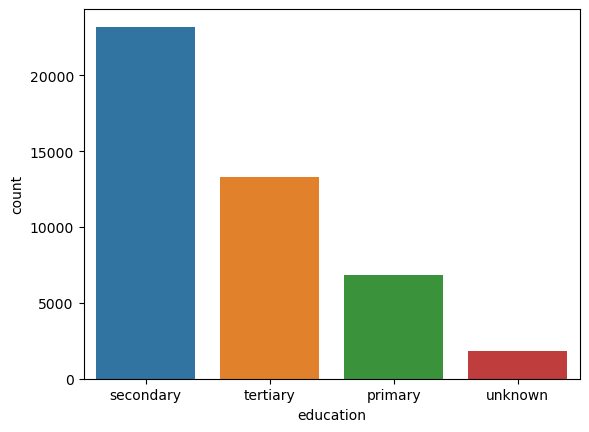

In [64]:
sns.barplot(x ="education", y = "count", data = effectif)

## Analyse Bivariée

<AxesSubplot:xlabel='y', ylabel='duration'>

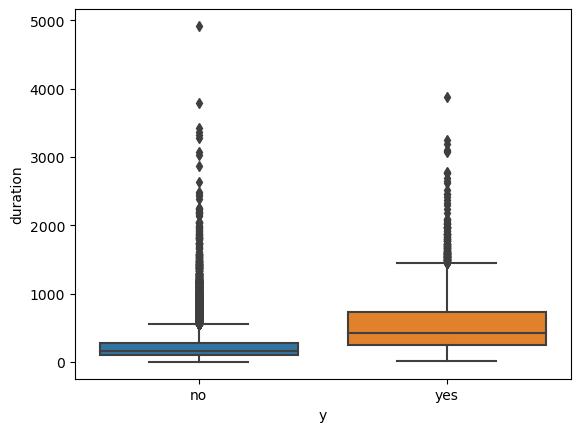

In [65]:
sns.boxplot(x = "y", y = "duration", data = df_majeur)

<AxesSubplot:xlabel='y', ylabel='age'>

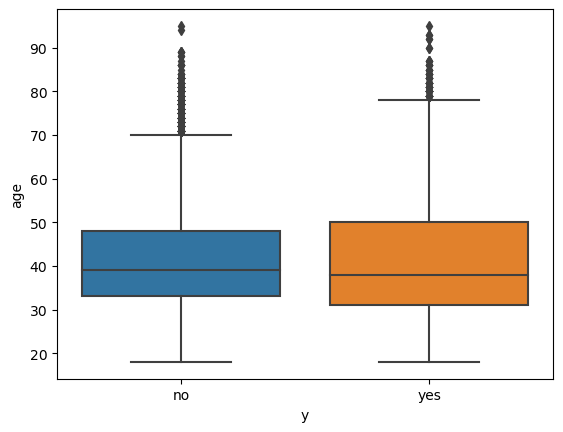

In [66]:
sns.boxplot(x = "y", y = "age", data = df_majeur)

<AxesSubplot:xlabel='y', ylabel='age'>

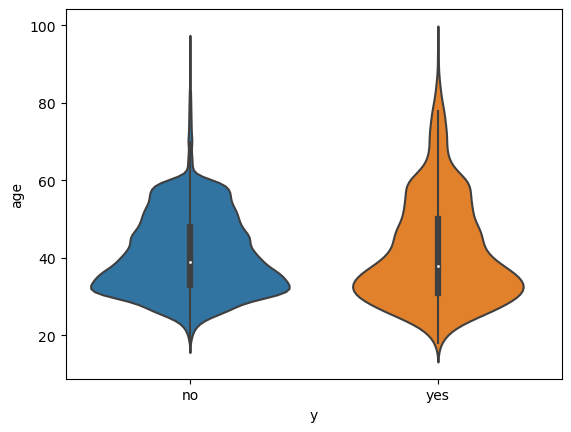

In [67]:
sns.violinplot(x = "y", y = "age", data = df_majeur)

### Graphique bivariée entre deux variables qualitatives

In [68]:
### Tableau de contingence
tab = pd.crosstab(df_majeur["y"], df_majeur["education"])
tab

education,primary,secondary,tertiary,unknown
y,,,,
no,6258,20749,11302,1605
yes,591,2450,1996,252


<AxesSubplot:xlabel='y', ylabel='count'>

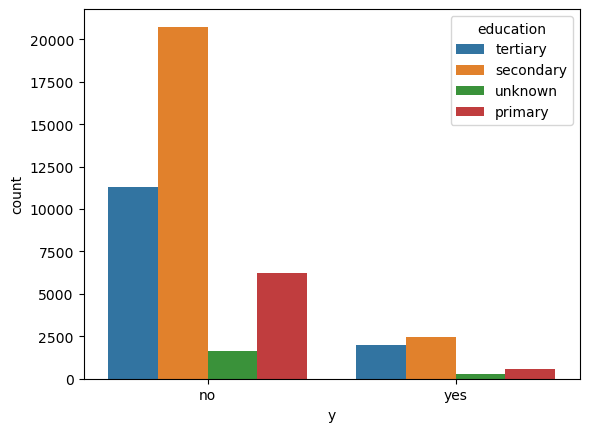

In [69]:
sns.countplot( x = "y", hue = "education", data = df_majeur)

In [70]:
#### Calcul de proportion

prop_table = df_majeur.groupby("y")["education"].value_counts(normalize = True).reset_index(name = "proportion")

In [71]:
prop_table

,y,education,proportion
0,no,secondary,0.519843
1,no,tertiary,0.283159
2,no,primary,0.156787
3,no,unknown,0.040211
4,yes,secondary,0.463226
5,yes,tertiary,0.377387
6,yes,primary,0.111741
7,yes,unknown,0.047646


<AxesSubplot:xlabel='y', ylabel='proportion'>

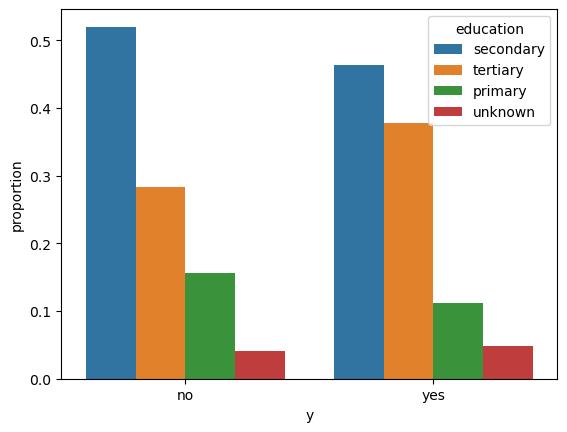

In [72]:
sns.barplot(x = "y", y ="proportion", hue = "education", data = prop_table)

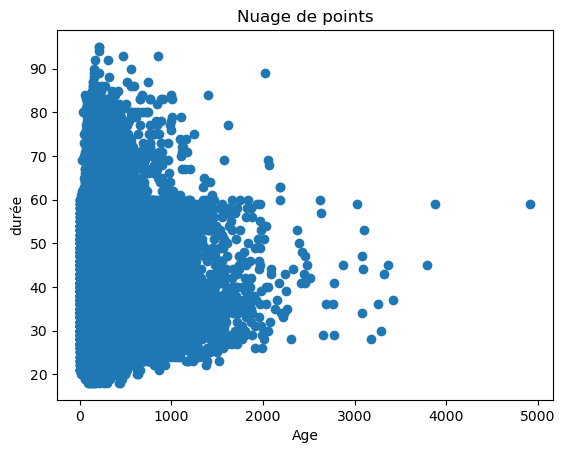

In [73]:
## le nuage des points
plt.scatter( x = "duration", y = "age", data = df_majeur)
plt.xlabel('Age')
plt.ylabel("durée")
plt.title('Nuage de points')
plt.show()

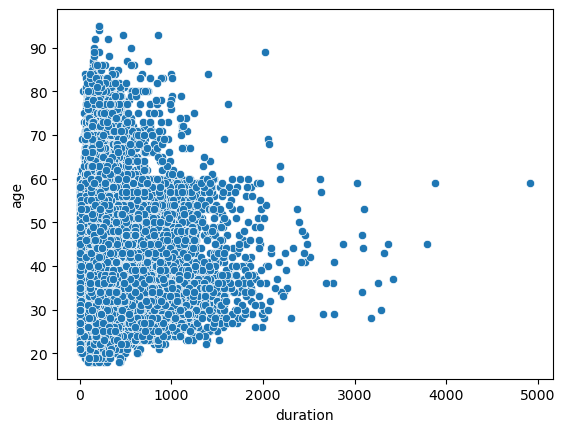

In [74]:
sns.scatterplot(x = "duration", y = "age", data =  df_majeur)
plt.show()

In [75]:
## récupération des variables quantitatives
var_quanti = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

In [76]:
## Création d'une base contenant uniquement des variables quantitatives

df_quanti = df_majeur[var_quanti]

In [77]:
df_quanti.dtypes

age           int64
balance     float64
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
dtype: object

In [78]:
### Matrice de corrélation

Matrice_corrélation = df_quanti.corr()
Matrice_corrélation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097827,-0.009113,-0.004639,0.004765,-0.023758,0.001290
balance,0.097827,1.000000,0.004350,0.021557,-0.014647,0.003387,0.016644
day,-0.009113,0.004350,1.000000,-0.030240,0.162388,-0.093154,-0.051776
duration,-0.004639,0.021557,-0.030240,1.000000,-0.084585,-0.001574,0.001197
campaign,0.004765,-0.014647,0.162388,-0.084585,1.000000,-0.088673,-0.032882
pdays,-0.023758,0.003387,-0.093154,-0.001574,-0.088673,1.000000,0.454811
previous,0.001290,0.016644,-0.051776,0.001197,-0.032882,0.454811,1.000000


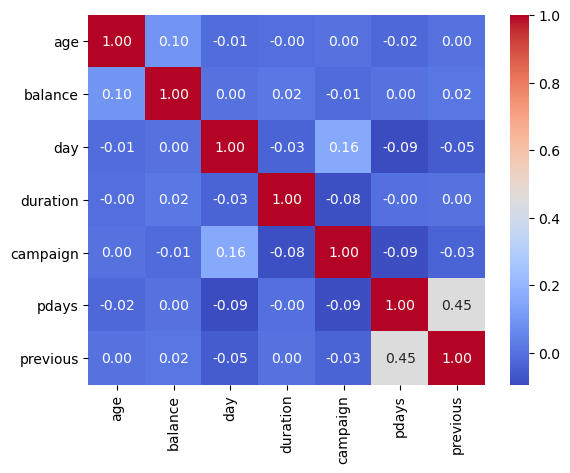

In [79]:
sns.heatmap(Matrice_corrélation, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

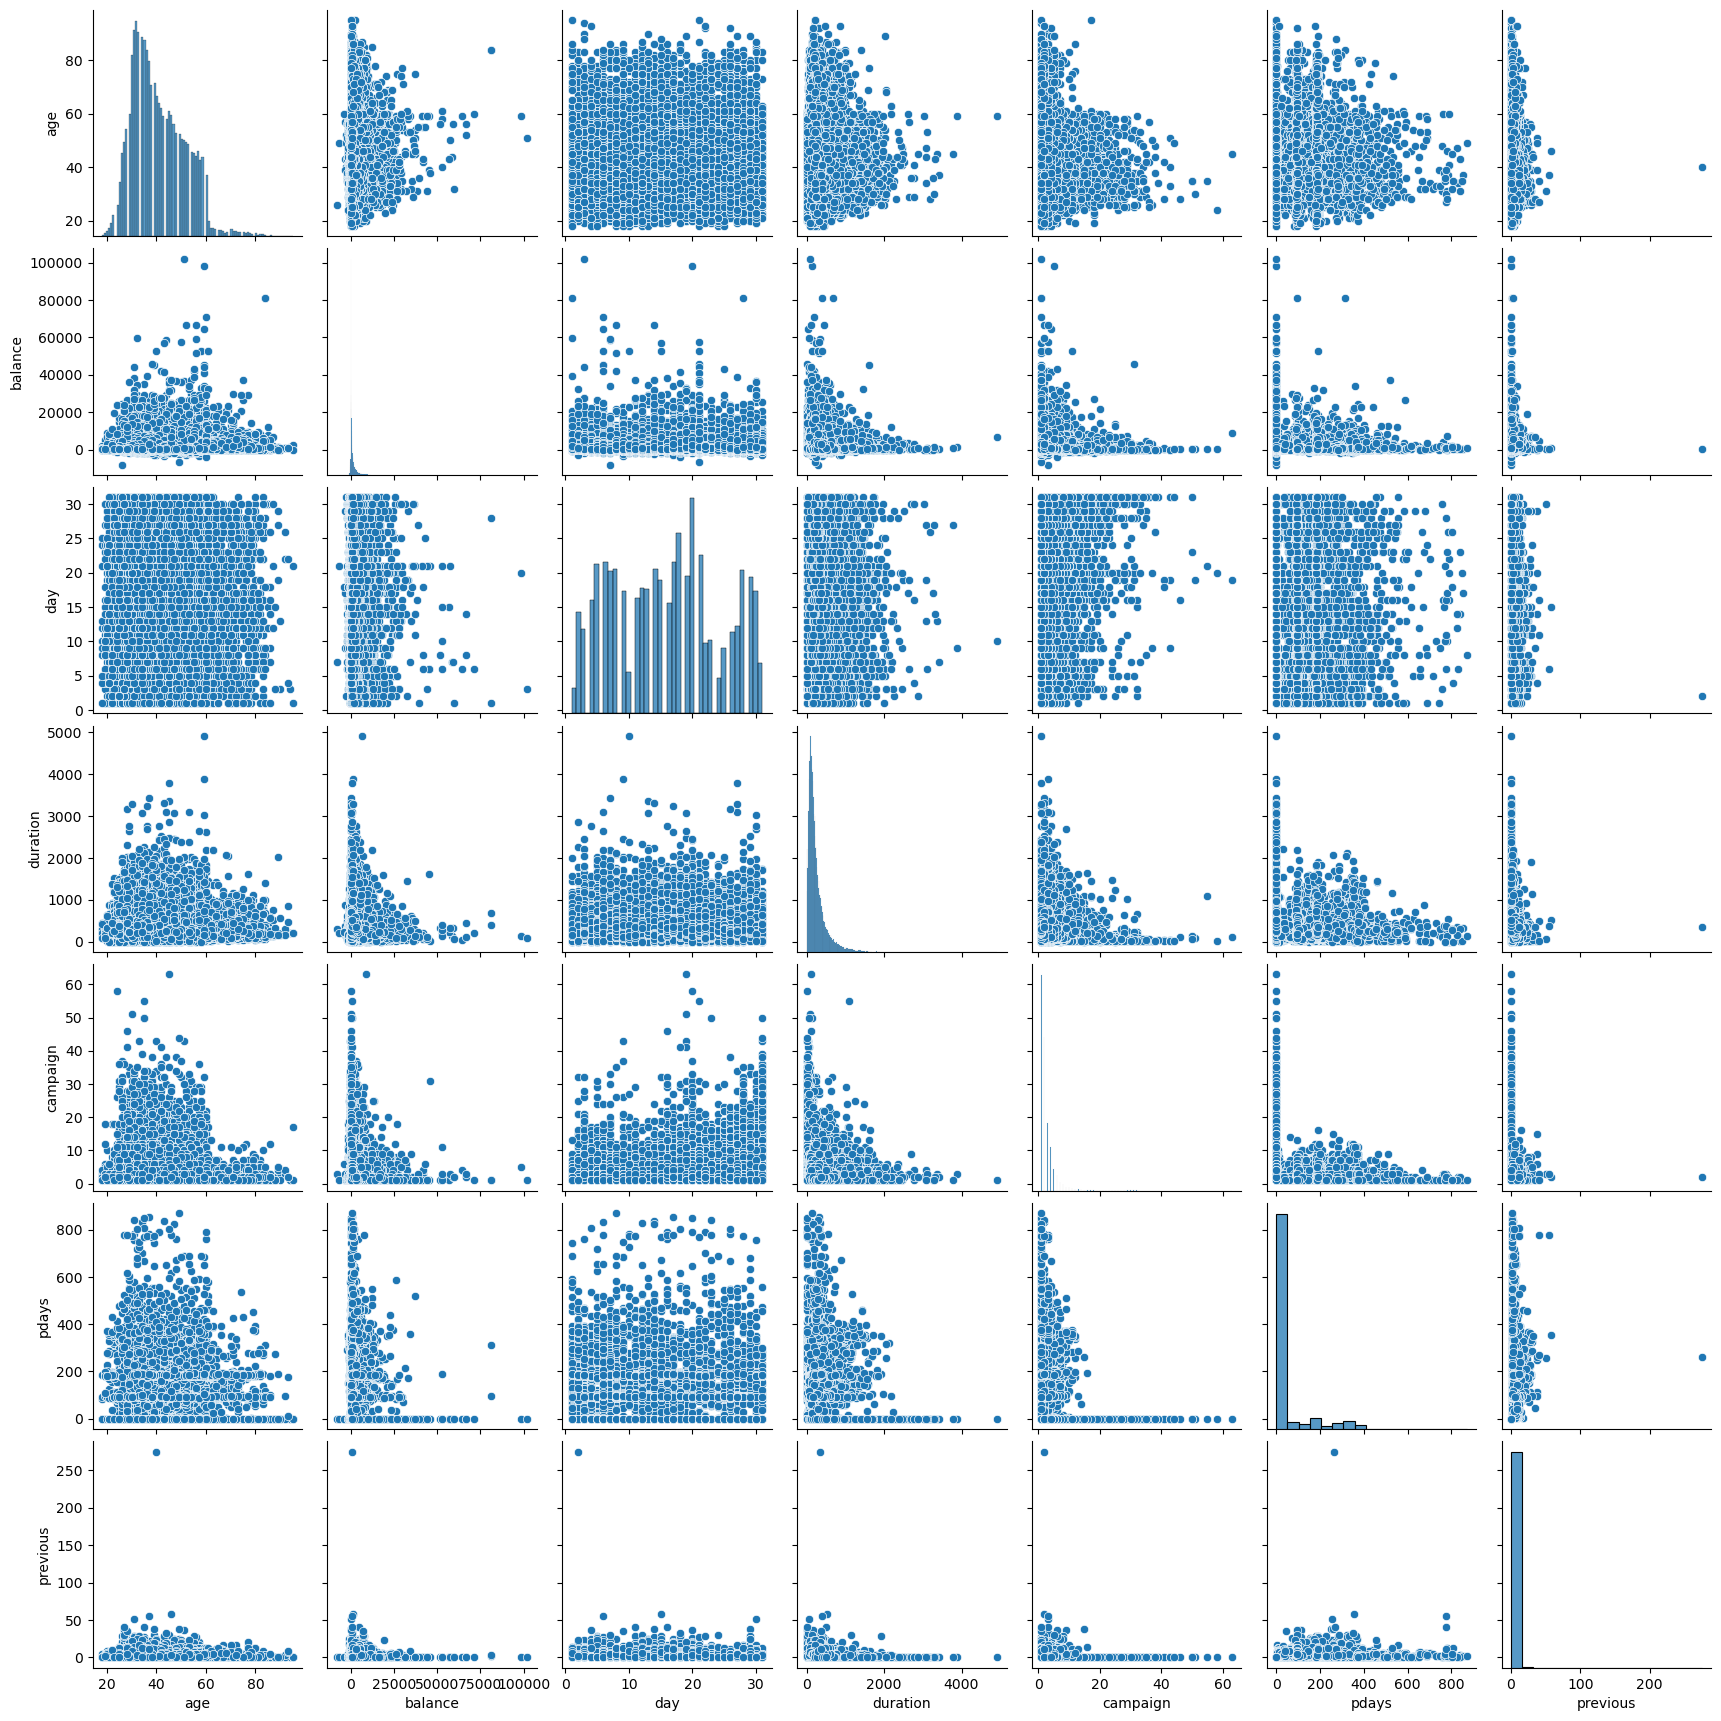

In [80]:
sns.pairplot(df_majeur)

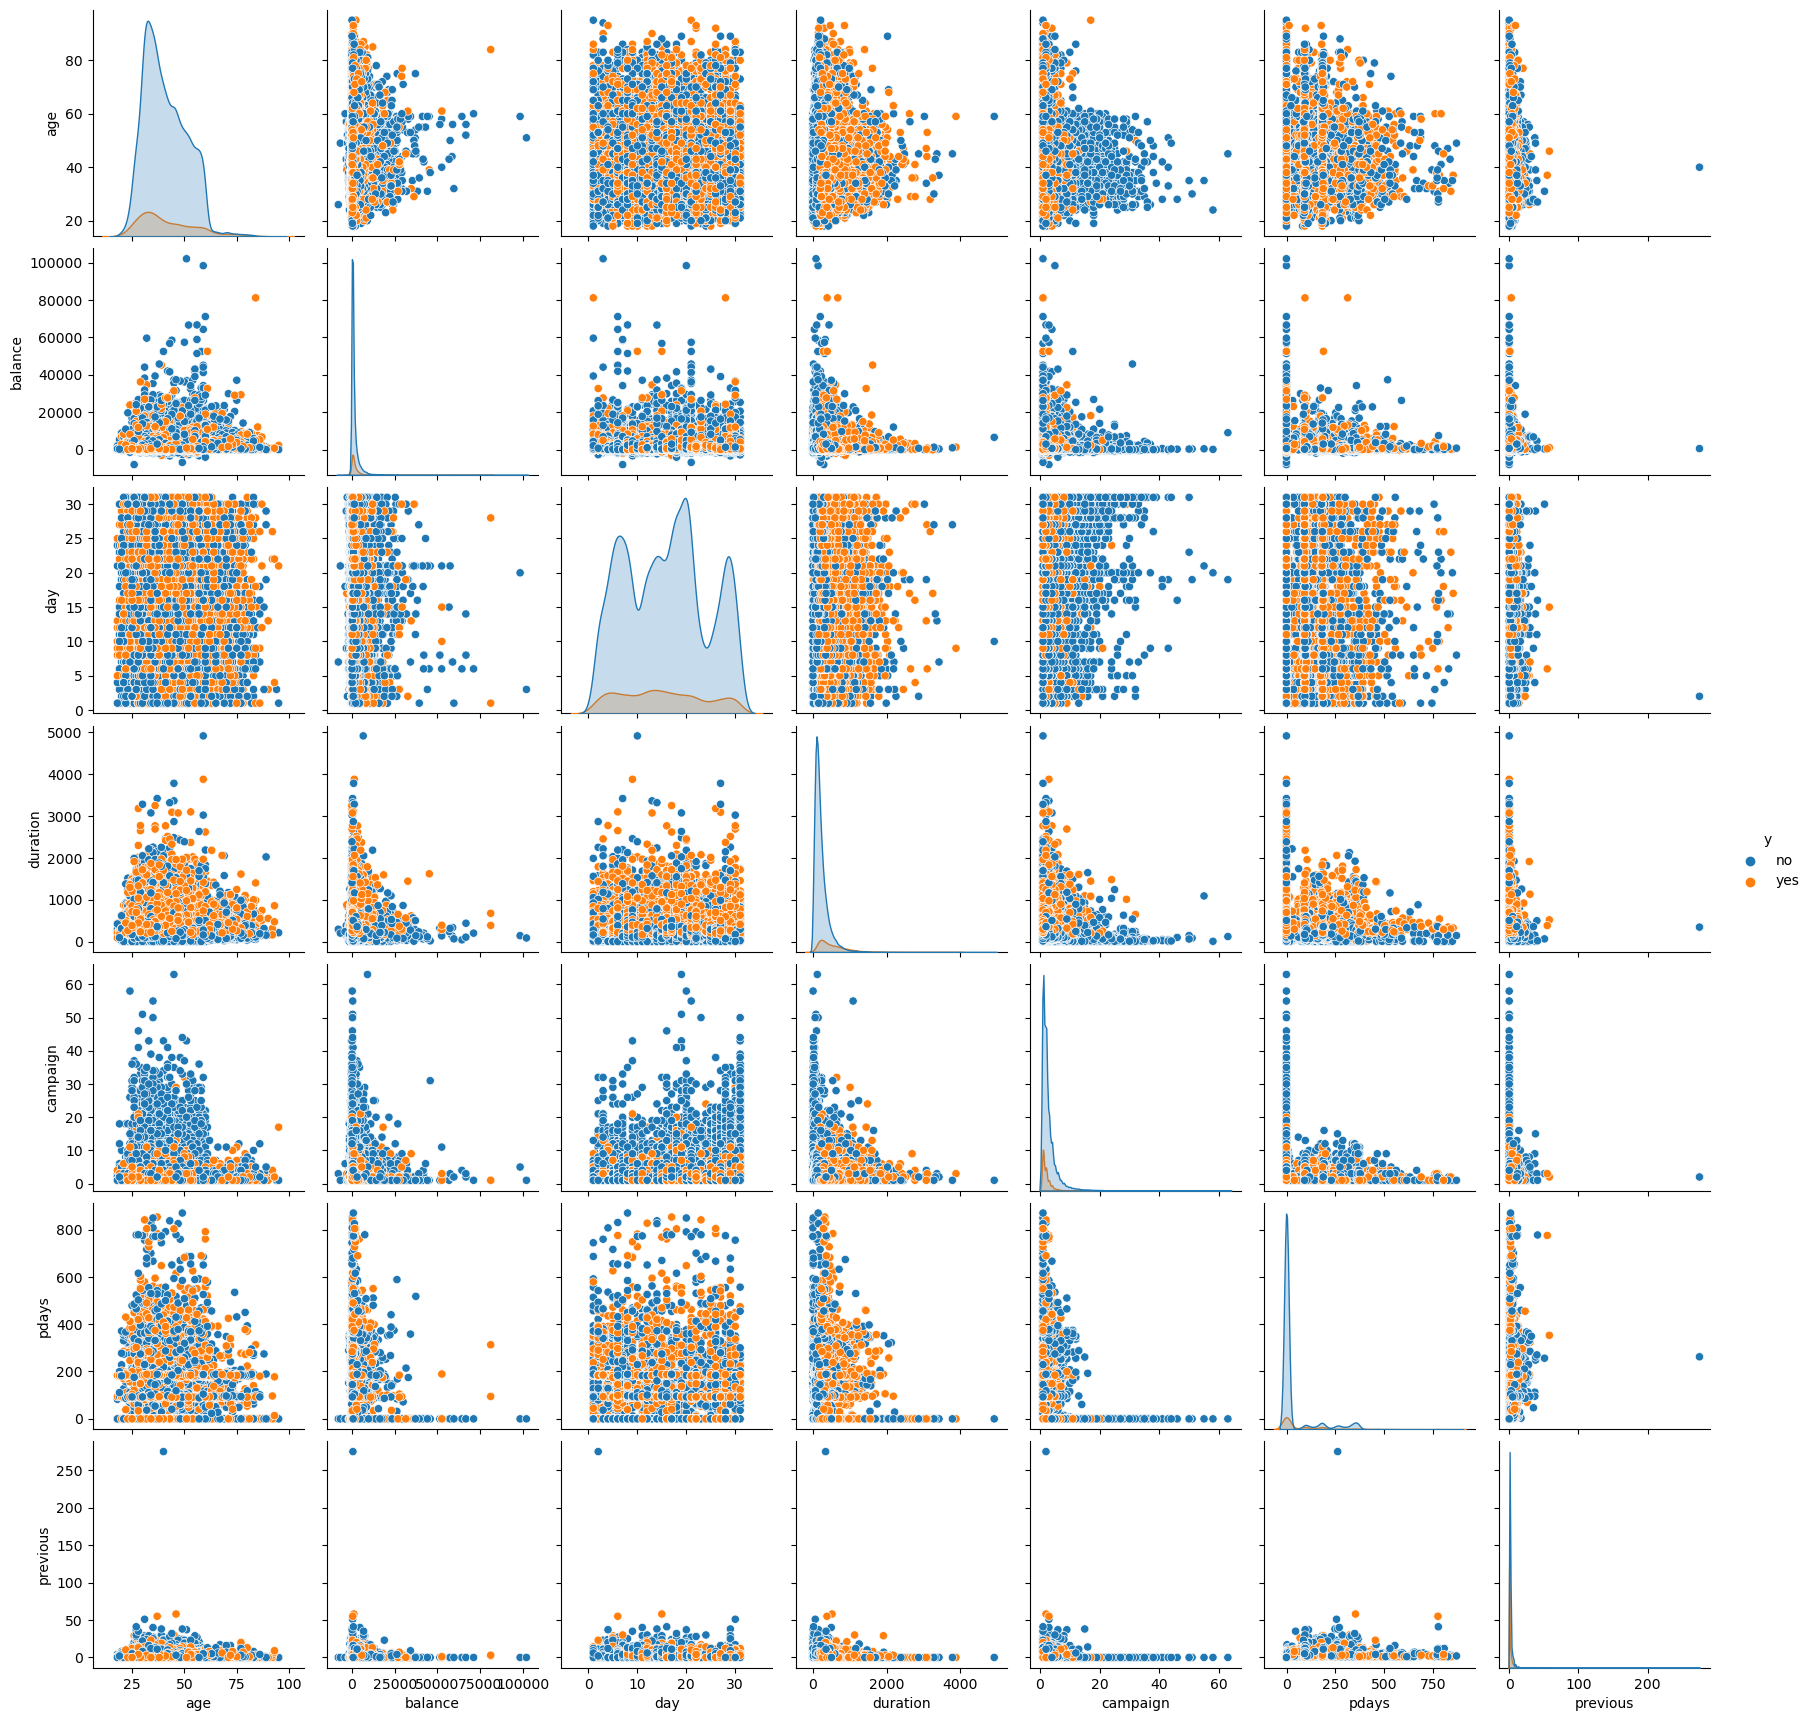

In [81]:
sns.pairplot(df_majeur, hue = "y")